In [1]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [2]:
import torch
from modules import IGR, Visualization, Operation, Network

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Define data set name and constraint type
dataset_name = 'riderr'
p = 2
constraint_name = str(p) + 'laplacian'
prev_epoch = 000
epoch = 5000
network_ver = 'v1_2'

In [5]:
# Load points
filename = mp + '/dataset/2d/' + dataset_name + '.vert'
data = Operation.read_txt2(filename, device=device)

In [6]:
traineddata_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_epoch) + '_' + network_ver + '.traineddata'
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=2, device=device)

No model found. New model created


Setting up
No previous loss value found.
Getting sampling range

Training
Epoch: 20   Loss: 1.3165441751480103   Learning rate: 0.0005
Surface loss: 0.21012061834335327   Normal loss: 1.0006909370422363   Constraint: 1.0573251247406006

Epoch: 40   Loss: 1.1872934103012085   Learning rate: 0.0005
Surface loss: 0.16026411950588226   Normal loss: 0.9159615635871887   Constraint: 1.110677719116211

Epoch: 60   Loss: 1.1363815069198608   Learning rate: 0.0005
Surface loss: 0.1721731573343277   Normal loss: 0.8491464853286743   Constraint: 1.1506186723709106

Epoch: 80   Loss: 1.0268287658691406   Learning rate: 0.0005
Surface loss: 0.12136951088905334   Normal loss: 0.7874698638916016   Constraint: 1.1798943281173706

Epoch: 100   Loss: 0.9704371094703674   Learning rate: 0.0005
Surface loss: 0.10391389578580856   Normal loss: 0.7486103773117065   Constraint: 1.1791284084320068

Epoch: 120   Loss: 0.9696189165115356   Learning rate: 0.0005
Surface loss: 0.13212567567825317   Normal loss: 0

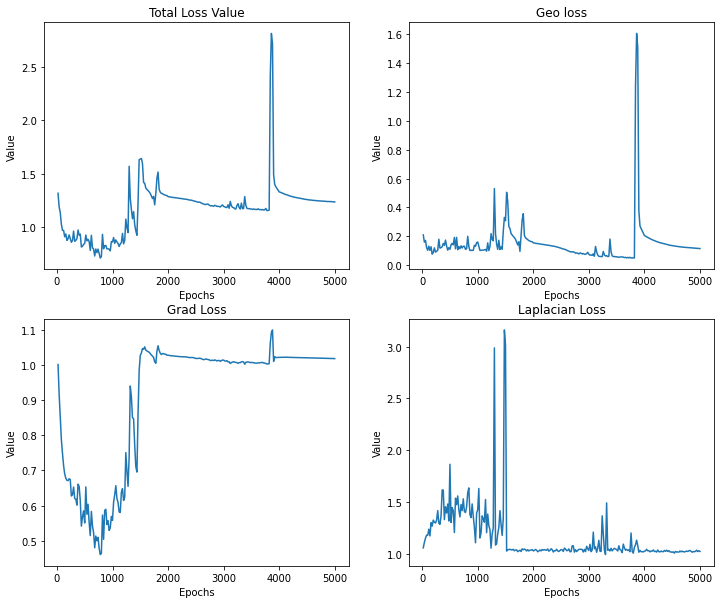

In [7]:
outfile = mp + '/figures/loss_value/' + dataset_name + '_' + constraint_name + '_' + network_ver + '.npy'
model, optimizer, scheduler = IGR.train(epoch,
                             model,
                             optimizer,
                             scheduler,
                             p=p,
                             batch_size=None,
                             data=data,
                             loss_output_path=outfile,
                             device=device)

In [8]:
save_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_epoch + epoch) + '_' + network_ver + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

In [9]:
xx, yy= Visualization.grid_from_torch(data[:,0:2], resx=50, resy=50, device=device)

In [10]:
# constraint_output = 'constraint_' + dataset_name + '_' + constraint_name + '_' + str(prev_iteration + iteration) + '_' + network_ver + '.csv'
constraint_output = None
vtk_output_path = None
z = Visualization.nn_sampling(model, xx, yy, 
                              constraint_output=constraint_output,
                              vtk_output_path = vtk_output_path,
                              device=device)

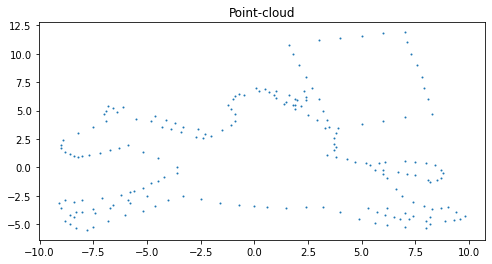

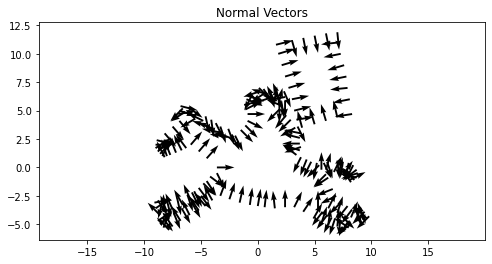

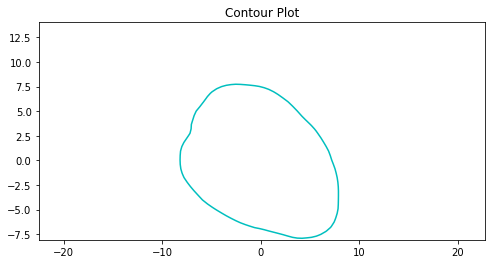

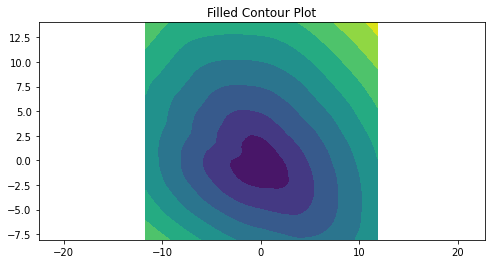

In [11]:
Visualization.visualize2(data[:,0:2].detach().cpu().numpy(), data[:,2:4].detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=True, surface=True, filled_contour=True)